#DEPENDENCIES
---
---

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#FUNCTIONS
---
---

In [70]:
def count_nulls(dataset, view=False):
    '''Cuenta el numero de valores "NO aceptables"'''
    for x in dataset.columns:
        nans = dataset[x].isin(Nulls)
        print([x, dataset[x][nans].count()])
        if view==True: print(dataset[x][nans])

def nulls_columns(dataset, column):
    '''Devuelve el data set filtrado por valores "NO aceptables" en una columna'''
    return dataset[dataset[column].isin(Nulls)]

def change_nulls(data, column, filter):
    missing = nulls_columns(data, column)
    try:
        for x in missing.index:
            y = data[data[filter]==missing[filter][x]]
            data[column][x] = y[y[column]>0][column].mean()
    except:
        print('No es posible realizar la conversion')

#EXECUTION
---
---

In [68]:
# Lectura de los datos
df = pd.read_csv('datos_clear.csv', sep='|')

In [69]:
df.drop(['Motivo', 'Concepto'], axis=1, inplace=True)

In [45]:
df.shape

(1342, 22)

In [46]:
df.dtypes

Fecha_prueba     object
Matricula        object
Temp_Amb        float64
Humr_Amb        float64
Marca            object
Modelo            int64
Cilindraje        int64
Combustible      object
Kilometraje       int64
Fecha_ITV        object
CDA              object
Temp_motor      float64
RPM_motor         int64
HC                int64
CO              float64
CO2             float64
O2              float64
RPM_Cru           int64
HC_Cru            int64
CO_Cru          float64
CO2_Cru         float64
O2_Cru          float64
dtype: object

In [47]:
df.head(5)

,Fecha_prueba,Matricula,Temp_Amb,Humr_Amb,Marca,Modelo,Cilindraje,Combustible,Kilometraje,Fecha_ITV,...,RPM_motor,HC,CO,CO2,O2,RPM_Cru,HC_Cru,CO_Cru,CO2_Cru,O2_Cru
0,2021-09-09 12:47:05,5418 BJS,24.6,40.0,MARCA 2,1980,2600,GNV_gasolina,0,2021-11-02,...,0,0,0.00,0.00,0.00,0,0,0.00,0.00,0.00
1,2021-08-13 10:47:46,4231 JWJ,26.5,36.1,MARCA 1,1998,4300,GNV,0,2021-08-11,...,740,466,2.57,9.60,1.40,2640,53,0.11,10.82,2.10
2,2021-08-13 11:21:09,1651 RBK,23.5,41.5,MARCA 4,2007,999,GNV_gasolina,56456,2020-08-14,...,990,198,1.05,13.70,0.85,2710,197,0.98,13.70,0.95
3,2021-08-13 11:59:04,1683 SRF,21.3,44.4,MARCA 2,2008,999,GNV_gasolina,784516,2021-07-10,...,890,233,0.81,11.27,0.76,2410,110,0.11,9.85,3.76
4,2021-08-13 12:15:04,6997 CXW,19.2,60.9,MARCA 5,2012,1493,GNV_gasolina,6984,2021-06-10,...,760,325,1.25,12.45,2.49,2410,226,1.53,12.19,2.61


In [48]:
# Busqueda de valores duplicados
df[df.duplicated()]

,Fecha_prueba,Matricula,Temp_Amb,Humr_Amb,Marca,Modelo,Cilindraje,Combustible,Kilometraje,Fecha_ITV,...,RPM_motor,HC,CO,CO2,O2,RPM_Cru,HC_Cru,CO_Cru,CO2_Cru,O2_Cru


In [49]:
# Busqueda de valores nulos
df.isnull().sum()

Fecha_prueba    0
Matricula       0
Temp_Amb        0
Humr_Amb        0
Marca           0
Modelo          0
Cilindraje      0
Combustible     0
Kilometraje     0
Fecha_ITV       1
CDA             6
Temp_motor      1
RPM_motor       0
HC              0
CO              0
CO2             0
O2              0
RPM_Cru         0
HC_Cru          0
CO_Cru          0
CO2_Cru         0
O2_Cru          0
dtype: int64

In [50]:
ind = []
for x in df.columns:
    ind.append(list(df[df[x].isnull()].index))
y = [[df.columns[x], ind[x]] for x in range(len(ind)) if bool(ind[x])==True]
print(y)

[['Fecha_ITV', [16]], ['CDA', [0, 8, 13, 22, 25, 62]], ['Temp_motor', [102]]]


In [51]:
# Filling features
df['Temp_motor'].iloc[102] = float(round(df['Temp_motor'].mean()))

In [53]:
Nulls = ['nan', 'NaN', np.nan, None, '', ' ', '-', '_']
count_nulls(df)

['Fecha_prueba', 0]
['Matricula', 0]
['Temp_Amb', 0]
['Humr_Amb', 0]
['Marca', 0]
['Modelo', 0]
['Cilindraje', 0]
['Combustible', 0]
['Kilometraje', 0]
['Fecha_ITV', 0]
['CDA', 0]
['Temp_motor', 0]
['RPM_motor', 0]
['HC', 0]
['CO', 0]
['CO2', 0]
['O2', 0]
['RPM_Cru', 0]
['HC_Cru', 0]
['CO_Cru', 0]
['CO2_Cru', 0]
['O2_Cru', 0]


In [54]:
Nulls = [0]
count_nulls(df)

['Fecha_prueba', 0]
['Matricula', 0]
['Temp_Amb', 0]
['Humr_Amb', 0]
['Marca', 0]
['Modelo', 0]
['Cilindraje', 2]
['Combustible', 0]
['Kilometraje', 10]
['Fecha_ITV', 0]
['CDA', 0]
['Temp_motor', 84]
['RPM_motor', 84]
['HC', 88]
['CO', 84]
['CO2', 84]
['O2', 85]
['RPM_Cru', 84]
['HC_Cru', 89]
['CO_Cru', 84]
['CO2_Cru', 84]
['O2_Cru', 86]


In [55]:
df[df['Cilindraje']==0].index

Int64Index([18, 76], dtype='int64')

In [56]:
df[df['Kilometraje']==0].index

Int64Index([0, 1, 17, 18, 30, 48, 49, 56, 60, 76], dtype='int64')

In [57]:
change_nulls(df, column='Kilometraje', filter='Modelo')

In [58]:
df[df['Kilometraje'].isnull()].index

Int64Index([0, 18, 30, 49, 76], dtype='int64')

In [59]:
df.isnull().sum()

Fecha_prueba    0
Matricula       0
Temp_Amb        0
Humr_Amb        0
Marca           0
Modelo          0
Cilindraje      0
Combustible     0
Kilometraje     5
Fecha_ITV       1
CDA             6
Temp_motor      0
RPM_motor       0
HC              0
CO              0
CO2             0
O2              0
RPM_Cru         0
HC_Cru          0
CO_Cru          0
CO2_Cru         0
O2_Cru          0
dtype: int64

In [71]:
#Eliminación registros nulos 
df.drop(list(df[df['Kilometraje'].isnull()].index), axis=0, inplace=True)
df.drop(list(df[df['Fecha_ITV'].isnull()].index), axis=0, inplace=True)
df.drop(list(df[df['CDA'].isnull()].index), axis=0, inplace=True)

In [61]:
df.isnull().sum()

Fecha_prueba    0
Matricula       0
Temp_Amb        0
Humr_Amb        0
Marca           0
Modelo          0
Cilindraje      0
Combustible     0
Kilometraje     0
Fecha_ITV       0
CDA             0
Temp_motor      0
RPM_motor       0
HC              0
CO              0
CO2             0
O2              0
RPM_Cru         0
HC_Cru          0
CO_Cru          0
CO2_Cru         0
O2_Cru          0
dtype: int64

In [62]:
df.shape

(1331, 22)

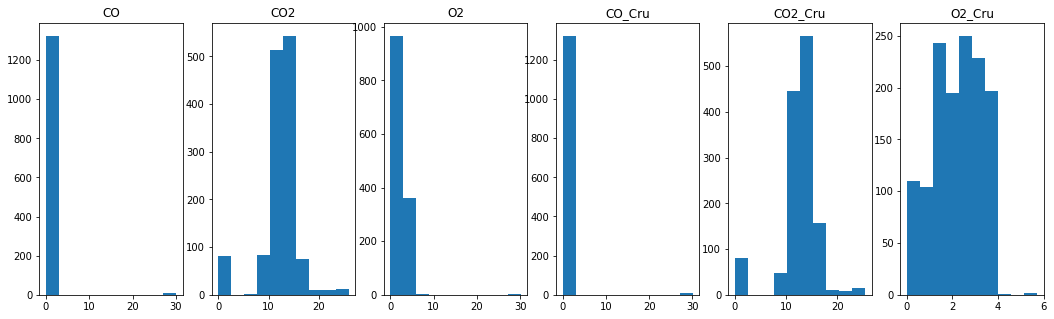

In [63]:
# Busqueda de valores anomalos en los features cuantitativos
column = ['CO', 'CO2', 'O2', 'CO_Cru', 'CO2_Cru', 'O2_Cru']
plt.figure(figsize=(18,5))
for x in enumerate(column):
    plt.subplot(1, 6, x[0]+1)
    plt.hist(df[x[1]])
    plt.title(column[x[0]])

In [64]:
df.reset_index(inplace=True, drop=True)

In [65]:
col = ['CO', 'O2', 'CO_Cru']
ind = []
for x in col:
    ind.append(list(df[df[x]>20.0].index))
y = [[col[x], ind[x]] for x in range(len(ind))]
print(y)

[['CO', [16, 21, 34, 47, 53, 56, 62]], ['O2', [12, 17]], ['CO_Cru', [21, 34, 37, 47, 53, 55, 60, 61, 62]]]


In [66]:
# Tratamos los datos faltantes o nulos de forma que los features no representativos sean iguales a el promedio de dichos features, pero 
#para los features representativos es preferible eliminar el registro.
df.drop(list(df[df['CO']>20.0].index), axis=0, inplace=True)
df['O2'].iloc[[12, 17]] = float(round(df['O2'].mean()))
df.drop(list(df[df['CO_Cru']>20.0].index), axis=0, inplace=True)

In [67]:
df.shape

(1320, 22)

In [ ]:
df.to_csv('/content/data_final.csv', sep="|",index=False)